In [19]:
import pandas as pd

In [17]:
import csv
from io import StringIO

In [15]:
with open(r'/Users/xinhuaijin/Desktop/assignments/lobster.csv', 'r') as lobster_file:
    lobster = lobster_file.read()


In [ ]:
lobster_data = StringIO(lobster)
df = pd.read_csv(lobster_data)

## part I

### A

In [21]:
df.head()

,Date,weekday,high_temp,precip_total,unique_visitors,gold_zone_rev,park_merch_rev,online_merch_rev,lobsterama_rev,lost_found_items,first_aid_incidents,operational_status,staff_hours,total_rev,sign_ups24,merch_promo
0,2023-05-29,Mon,71,0.00,5448,9623,6028,39,9665,9,1,95.4,2042.83,193414.58,61.0,0
1,2023-05-30,Tue,66,0.00,3977,6462,2461,550,7368,2,6,93.3,1223.69,111946.06,76.0,0
2,2023-05-31,Wed,71,0.00,4634,5495,2825,1188,6991,3,3,86.6,1425.85,130465.64,92.0,0
3,2023-06-01,Thu,84,T,3012,10683,2379,1184,7803,4,4,90.8,976.80,105386.53,67.0,1
4,2023-06-02,Fri,85,0.09,5741,8932,4242,187,10173,7,3,86.2,1461.38,172071.35,93.0,0


### B

In [22]:
pd.set_option('display.max_rows', 20)  

I set up jupiter to display 20 rows which is good enough 

### C

In [23]:
df.shape

(99, 16)

There are 99 rows and 16 columns in the dataset.

### D

In [25]:
print(df.describe(include = "all"))

              Date weekday  high_temp precip_total  unique_visitors  \
count           99      99  99.000000           99        99.000000   
unique          99       7        NaN           35              NaN   
top     2023-05-29     Mon        NaN         0.00              NaN   
freq             1      15        NaN           40              NaN   
mean           NaN     NaN  74.535354          NaN      4445.121212   
std            NaN     NaN   7.450946          NaN       919.377077   
min            NaN     NaN  50.000000          NaN      2409.000000   
25%            NaN     NaN  70.500000          NaN      3830.500000   
50%            NaN     NaN  74.000000          NaN      4303.000000   
75%            NaN     NaN  80.500000          NaN      5326.500000   
max            NaN     NaN  89.000000          NaN      5878.000000   

        gold_zone_rev  park_merch_rev  online_merch_rev  lobsterama_rev  \
count       99.000000       99.000000         99.000000       99.000000 

All the categorical value will have different statistics in top, unique, and freq value. Among all variables, only "Date", "weekday", and "precip_total" have those statistics, so they are categorical variables and the others are numerical.

### E

a.The 'T' value in precipitation data usually indicates "Trace". It means that there was a small amount of precipitation that is not enough to measure accurately.

In [33]:
# b
df['precip_total'] = df['precip_total'].replace('T', 0.001).astype(float)

### F

In [30]:
# a
df['is_weekend'] = (df['weekday'].isin(['Fri', 'Sat', 'Sun'])).astype(int)

In [34]:
# b
df['very_rainy'] = df['precip_total'] > 1.0

In [39]:
# c
df['first_aid_incidents'], df['lost_found_items'] = df['lost_found_items'], df['first_aid_incidents']
df.head()

,Date,weekday,high_temp,precip_total,unique_visitors,gold_zone_rev,park_merch_rev,online_merch_rev,lobsterama_rev,lost_found_items,first_aid_incidents,operational_status,staff_hours,total_rev,sign_ups24,merch_promo,is_weekend,very_rainy
0,2023-05-29,Mon,71,0.000,5448,9623,6028,39,9665,1,9,95.4,2042.83,193414.58,61.0,0,0,False
1,2023-05-30,Tue,66,0.000,3977,6462,2461,550,7368,6,2,93.3,1223.69,111946.06,76.0,0,0,False
2,2023-05-31,Wed,71,0.000,4634,5495,2825,1188,6991,3,3,86.6,1425.85,130465.64,92.0,0,0,False
3,2023-06-01,Thu,84,0.001,3012,10683,2379,1184,7803,4,4,90.8,976.80,105386.53,67.0,1,0,False
4,2023-06-02,Fri,85,0.090,5741,8932,4242,187,10173,3,7,86.2,1461.38,172071.35,93.0,0,1,False


### G

In [42]:
# a
total_revenue = df['total_rev'].sum()
print("the total revenue is", total_revenue)


the total revenue is 13347279.580000002


In [44]:
# b
rainy_days = df[df['very_rainy']]
not_rainy_days = df[~df['very_rainy']]

average_lobsterama_rainy = rainy_days['lobsterama_rev'].mean()
average_lobsterama_not_rainy = not_rainy_days['lobsterama_rev'].mean()

average_merchandise_rainy = rainy_days['park_merch_rev'].mean()
average_merchandise_not_rainy = not_rainy_days['park_merch_rev'].mean()

difference_lobsterama = abs(average_lobsterama_rainy - average_lobsterama_not_rainy)
difference_merchandise = abs(average_merchandise_rainy - average_merchandise_not_rainy)


# Print the results
print(f"Difference in Lobsterama Spending: {difference_lobsterama}")
print(f"Difference in Merchandise Spending: {difference_merchandise}")
print(f"For lobsterama, it decreases:{difference_lobsterama/average_lobsterama_not_rainy}")
print(f"For merchandise, it decreases:{difference_merchandise/average_merchandise_not_rainy}")
            


Difference in Lobsterama Spending: 1783.087234042553
Difference in Merchandise Spending: 993.1319148936168
For lobsterama, it decreases:0.22163127085104667
For merchandise, it decreases:0.2775249567456046


By the calculation I write above, park merchandise spending have larger relative difference.

In [47]:
# c
correlation = df['high_temp'].corr(df['lost_found_items'])
print(f"Correlation between Temperature and Lost & Found Items: {correlation}")


Correlation between Temperature and Lost & Found Items: 0.08304029626399438


In this case, a correlation of 0.083 indicates a very weak positive relationship, which means that as temperature increases, there is a slight tendency for the number of new lost & found items to also increase. However, this relationship is not very strong.

### H

In [54]:
# a
std_dev_gold_zone_revenue = df['gold_zone_rev'].std()
std_dev_total_daily_revenue = (df['park_merch_rev']+df['lobsterama_rev']).std()

print(f"Standard Deviation of Gold Zone Revenue: {std_dev_gold_zone_revenue}")
print(f"Standard Deviation of Total Daily Park Revenue: {std_dev_total_daily_revenue}")


Standard Deviation of Gold Zone Revenue: 1978.5318733185406
Standard Deviation of Total Daily Park Revenue: 2469.648338257245


b.It's misleading to directly compare the standard deviations because the scales of the two variables (Gold Zone revenue and Total Daily Park Revenue) may be different. A higher standard deviation does not necessarily mean that the variable has more variability; it could be due to the scale of the variable.

In [56]:
# c.i
cv_gold_zone_revenue = (std_dev_gold_zone_revenue / df['gold_zone_rev'].mean()) * 100
cv_total_daily_revenue = (std_dev_total_daily_revenue / (df['park_merch_rev']+df['lobsterama_rev']).mean()) * 100

print(f"Coefficient of Variation for Gold Zone Revenue: {cv_gold_zone_revenue}%")
print(f"Coefficient of Variation for Total Daily Park Revenue: {cv_total_daily_revenue}%")


Coefficient of Variation for Gold Zone Revenue: 24.878911468202634%
Coefficient of Variation for Total Daily Park Revenue: 21.50586083520621%


ii.The coefficient of variation (CV) standardizes the measure of variability by expressing it as a percentage of the mean. This allows for a more meaningful comparison of relative variability between two variables, even when they have different units or scales. It provides insight into the relative stability or consistency of the variables, which may not be evident from standard deviations alone.

### I

In [58]:
missing_values = df.isnull().sum()
print (missing_values)

Date                   0
weekday                0
high_temp              0
precip_total           0
unique_visitors        0
gold_zone_rev          0
park_merch_rev         0
online_merch_rev       0
lobsterama_rev         0
lost_found_items       0
first_aid_incidents    0
operational_status     5
staff_hours            3
total_rev              0
sign_ups24             0
merch_promo            0
is_weekend             0
very_rainy             0
dtype: int64


a.Nature of the Data: Sometimes missing data is inherent to the nature of the data and imputation might introduce more noise than leaving them as NaNs.

Statistical Validity: Depending on the analysis being performed, certain statistical methods can handle missing data without imputation.

Avoiding Bias: Imputation methods can introduce bias if not done carefully. Leaving missing values alone can avoid introducing unintended bias.

### j

In [59]:
# a
df = df.rename(columns={'operational_status': 'op_status'})

## part I

In [60]:
import matplotlib.pyplot as plt

### K

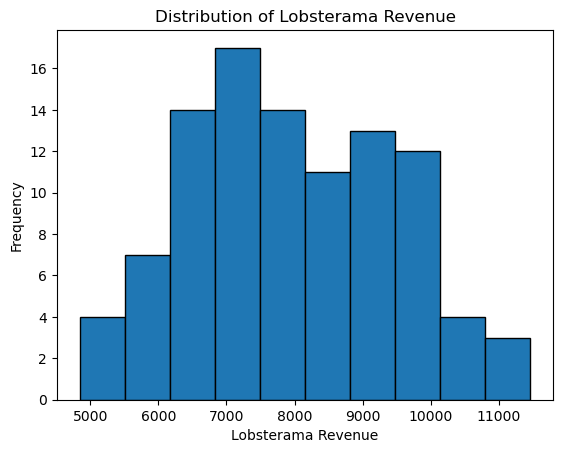

In [61]:
plt.hist(df['lobsterama_rev'], bins=10, edgecolor='k')
plt.xlabel('Lobsterama Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Lobsterama Revenue')
plt.show()


a. This histogram shows the distribution of Lobsterama Revenue. It appears to be right-skewed, indicating that there are fewer instances of high revenue and more instances of lower revenue.

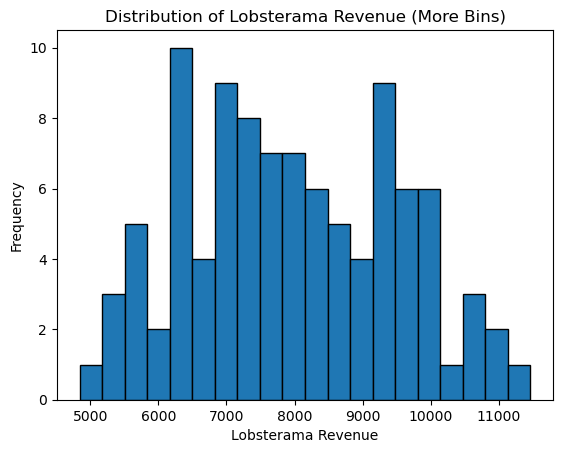

In [63]:
#b.
plt.hist(df['lobsterama_rev'], bins=20, edgecolor='k')
plt.xlabel('Lobsterama Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Lobsterama Revenue (More Bins)')
plt.show()

It provides more detail about the distribution. It highlights smaller peaks and variations in revenue.

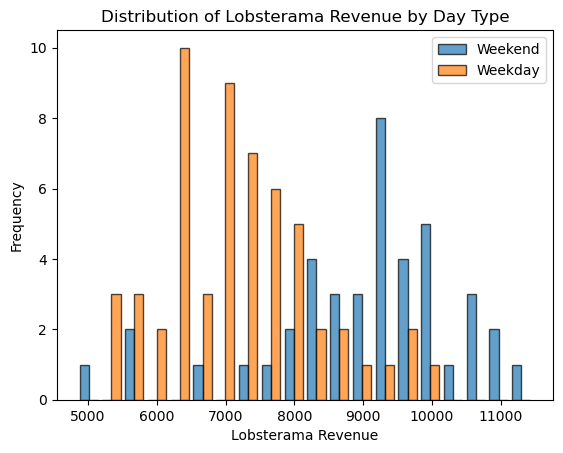

In [69]:
plt.hist([df[df['is_weekend'] == 1]['lobsterama_rev'], df[df['is_weekend'] == 0]['lobsterama_rev']], bins=20, edgecolor='k', alpha=0.7, label=['Weekend', 'Weekday'])
plt.xlabel('Lobsterama Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Lobsterama Revenue by Day Type')
plt.legend()
plt.show()

It provides insights into whether revenue patterns differ between weekends and weekdays. It's expected that weekends may have higher revenue due to increased visitor traffic.

### L

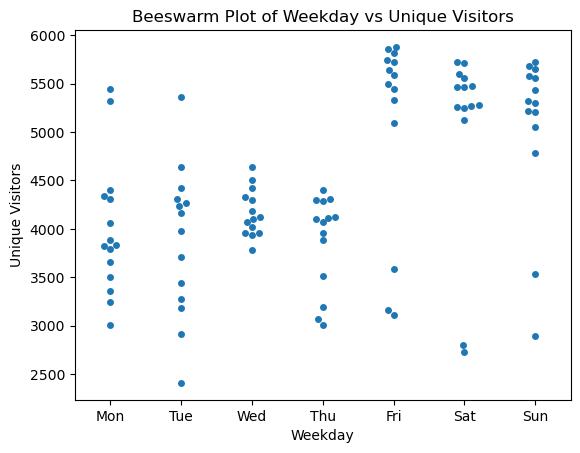

In [72]:
import seaborn as sns
sns.swarmplot(x='weekday', y='unique_visitors', data=df)
plt.xlabel('Weekday')
plt.ylabel('Unique Visitors')
plt.title('Beeswarm Plot of Weekday vs Unique Visitors')
plt.show()

a.This beeswarm plot displays the distribution of unique visitors on different weekdays. It shows that the number of unique visitors varies throughout the week. It indicates that unique visitor is more on weekend than on weekdays.

In [78]:
# b
busy_mondays = df[(df['weekday'] == 'Mon') & (df['unique_visitors'] > 5000)].sort_values(by='unique_visitors', ascending=False)
busy_tuesday = df[(df['weekday'] == 'Tue') & (df['unique_visitors'] > 5000)].sort_values(by='unique_visitors', ascending=False)

print("Unusually Busy Mondays:")
print(busy_mondays.head(2))

print("\nUnusually Busy Tuesday:")
print(busy_tuesday.head(1))

Unusually Busy Mondays:
          Date weekday  high_temp  precip_total  unique_visitors  \
0   2023-05-29     Mon         71           0.0             5448   
98  2023-09-04     Mon         81           0.0             5315   

    gold_zone_rev  park_merch_rev  online_merch_rev  lobsterama_rev  \
0            9623            6028                39            9665   
98           8623            5490               640            9718   

    lost_found_items  first_aid_incidents  op_status  staff_hours  total_rev  \
0                  1                    9       95.4      2042.83  193414.58   
98                 2                    2       90.0      1924.81  182146.72   

    sign_ups24  merch_promo  is_weekend  very_rainy  
0         61.0            0           0       False  
98       180.6            0           0       False  

Unusually Busy Tuesday:
          Date weekday  high_temp  precip_total  unique_visitors  \
36  2023-07-04     Tue         76          0.27             5

They all have high stuff hours and they are all non-rainy days.

### M

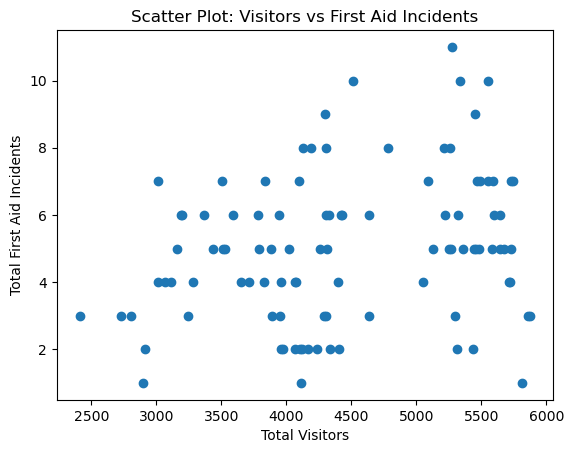

In [79]:
plt.scatter(df['unique_visitors'], df['first_aid_incidents'])
plt.xlabel('Total Visitors')
plt.ylabel('Total First Aid Incidents')
plt.title('Scatter Plot: Visitors vs First Aid Incidents')
plt.show()


a. This scatter plot shows the relationship between the total number of visitors and the total number of first aid incidents. It appears to have a positive correlation, suggesting that as the number of visitors increases, there tends to be a higher number of first aid incidents. This could be due to a larger crowd size leading to a higher likelihood of incidents.

### N

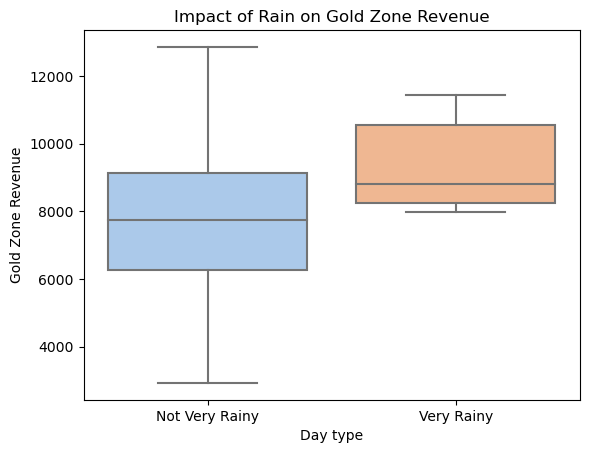

In [82]:
#a 
sns.boxplot(x='very_rainy', y='gold_zone_rev', data=df, palette='pastel')
plt.xlabel('Day type')
plt.ylabel('Gold Zone Revenue')
plt.title('Impact of Rain on Gold Zone Revenue')
plt.xticks([0, 1], ['Not Very Rainy', 'Very Rainy'])
plt.show()

This boxplot compares the distribution of Gold Zone revenue on very rainy days vs. days that are not very rainy. It allows you to visually compare the the shape, variability, and median between the two conditions. It shows higher revenue on very rainy days due to potential reduced attendance and outdoor activities being affected by the rain, so people tend to be willing to stay in Gold Zone which is indoor.

### O

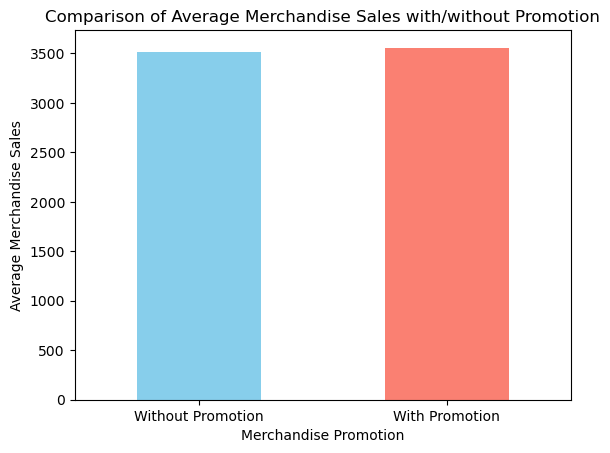

In [85]:
# Assuming 'merchandise_promotion' and 'park_merchandise_sales' are column names
promotion_sales = df.groupby('merch_promo')['park_merch_rev'].mean()

# Create a bar plot
promotion_sales.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Merchandise Promotion')
plt.ylabel('Average Merchandise Sales')
plt.title('Comparison of Average Merchandise Sales with/without Promotion')
plt.xticks([0, 1], ['Without Promotion', 'With Promotion'], rotation=0)
plt.show()


This indicates that, on average, there is a slightly higher merchandise revenue on days with the promotion compared to days without it. The difference in revenue is relatively small.
The reason might be the promotion is not strong enough for visitors to buy more.

### P

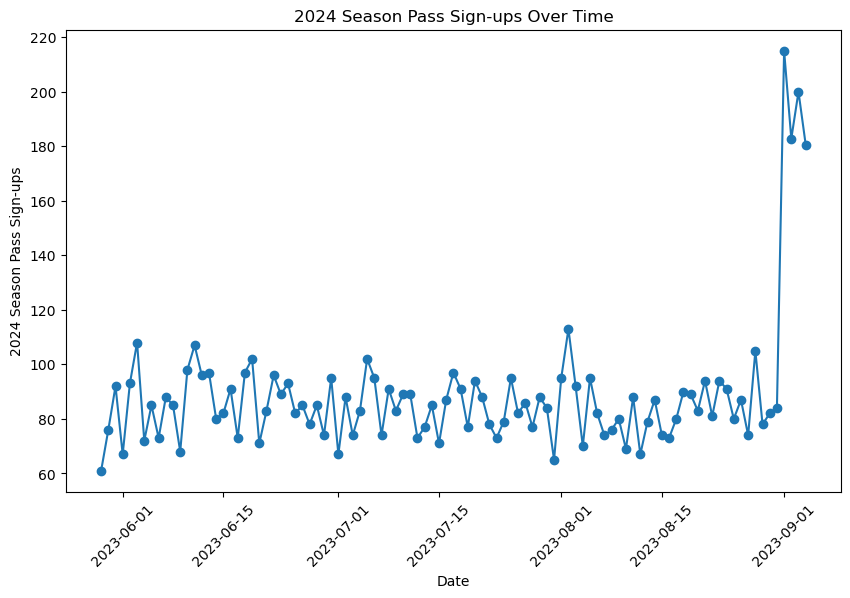

In [87]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['sign_ups24'], marker='o')
plt.xlabel('Date')
plt.ylabel('2024 Season Pass Sign-ups')
plt.title('2024 Season Pass Sign-ups Over Time')
plt.xticks(rotation=45)
plt.show()

This line plot displays the trend of 2024 season pass sign-ups over time. It allows you to observe any patterns or trends in season pass sign-ups throughout the specified period. The plot shows an apparent peak after September. It might because of September 25th which is the national lobster day.

## Part III

### A

I measured the steps taken per day with my phone from Friday to Sunday. I took 7536 steps on Friday, 435 steps on Saturday, and 6790 steps on Sunday.

On Friday, I had classes so I went to school which made me take lots of steps. On Saturday, I felt very tired of studying for whole week so I stayed at home and did not go out at all. And on Sunday, I went to play badminton in the BU fitness and recreation center. The BU fitness and receation center is nearer to me campare to my program's building so it takes less steps than on Friday. However, there should be more steps for Sunday because I did not take my phone with me when I was playing badminton. By the statistics, I found that the daily amount of exercise for me is not evenly distributed. I might want to keep exercise everyday in the future in order to stay healthy.